# INFO 3402 – Class 04: Introduction to pandas

[Brian C. Keegan, Ph.D.](http://brianckeegan.com/)  
[Assistant Professor, Department of Information Science](https://www.colorado.edu/cmci/people/information-science/brian-c-keegan)  
University of Colorado Boulder  

Copyright and distributed under an [MIT License](https://opensource.org/licenses/MIT).

## Learning Objectives
This may review content you have learned in other classes, but we want to start with the same foundation since pandas is so fundamental to everything else we will do in this class!

* The two fundamental data types in pandas are the `Series` and `DataFrame`
* Different options for reading data into and out of pandas
* Summarizing data
* Indexing and selecting data with Boolean indexing

## Load libraries

In [18]:
import pandas as pd
import numpy as np

pd.options.display.max_columns = 100

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sb

# Pre-class lecture

In the pre-class lecture, we'll cover:

* fundamental data types
* selecting and acccessing data
* deleting data
* replacing data

## Fundamental data types

There are two fundamental data types in `pandas`: a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html#pandas.DataFrame) and a [`Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html#pandas.Series). 

A `Series` is a one-dimensional array (like a `list`) and is basically a "column" of data. We can take a list of values and construct it into a Series object.

In [10]:
first_7_letters_list = ['a','b','c','d','e','f','g']

first_7_letters_series = pd.Series(first_7_letters_list)

first_7_letters_series

0    a
1    b
2    c
3    d
4    e
5    f
6    g
dtype: object

If we had a `np.array` of random values, we could also construct a `Series` out of these values.

In [11]:
random_10_digits_array = np.random.randint(0,9,10)

random_10_digits_series = pd.Series(random_10_digits_array)

random_10_digits_series

0    6
1    4
2    5
3    4
4    3
5    8
6    2
7    1
8    2
9    8
dtype: int32

A `DataFrame` is basically a collection of `Series`. We can construct a `DataFrame` from a dictionary where the keys are (by default) the column names and the values are arrays (`Series` to be safe, but also `lists` or `np.array` objects).

In [12]:
second_7_letters_list = ['h','i','j','k','l','m','n']

second_7_letters_series = pd.Series(second_7_letters_list)

**Option 1**: Constructing a `DataFrame` directly from an array.

In [13]:
first_14_letters_dataframe = pd.DataFrame({'First 7':first_7_letters_list,
                                           'Second 7':second_7_letters_list})

first_14_letters_dataframe

,First 7,Second 7
0,a,h
1,b,i
2,c,j
3,d,k
4,e,l
5,f,m
6,g,n


**Option 2**: Constructing a `DataFrame` from `Series`.

In [14]:
f14l_df_from_s = pd.DataFrame({'First 7':first_7_letters_series,
                               'Second 7':second_7_letters_series})

f14l_df_from_s

,First 7,Second 7
0,a,h
1,b,i
2,c,j
3,d,k
4,e,l
5,f,m
6,g,n


### Exercise 01
Now let's flex those iterating and debugging computational thinking practices. What happens if we made a `Series` with 8 letters instead of 7 and added it to the `DataFrame` as a third column. 

Try constructing the `DataFrame` using the `list` (Option 1 above) and from the `Series` (Option 2 above).

What do you expect would happen? Why? What actually happens? Why?

In [15]:
third_8_letters_list = ['o','p','q','r','s','t','u','v']
third_8_letters_series = pd.Series(third_8_letters_list)

**Option 1**: Construct a `DataFrame` called `f22l_df_from_l` using the lists `first_7_letters_list`, `second_7_letters_list`, and `third_8_letters_list`. (You should get a `ValueError`. That's ok!)

In [16]:
f22_df_from_l = pd.DataFrame({'First 7':first_7_letters_list,
                              'Second 7':second_7_letters_list,
                              'Third 8':third_8_letters_list
                             })

f22_df_from_l

ValueError: arrays must all be same length

**Option 2**: Construct a `DataFrame` called `f22l_df_from_s` using the `Series` `first_7_letters_series`, `second_7_letters_series`, and `third_8_letters_series`.

In [19]:
f22_df_from_s = pd.DataFrame({'First 7':first_7_letters_series,
                              'Second 7':second_7_letters_series,
                              'Third 8':third_8_letters_series
                             })

f22_df_from_s

,First 7,Second 7,Third 8
0,a,h,o
1,b,i,p
2,c,j,q
3,d,k,r
4,e,l,s
5,f,m,t
6,g,n,u
7,NaN,NaN,v


The one difference and the error message from the first option all implicate the length of 8 confusing the `DataFrame` constructor when working with `list` but not with `Series`. We'll get into the why this happens and how to fix it in a bit, but you should have a gut feeling that you can trust `Series` more than `list`s when constructing `DataFrame`s from scratch (which is rare).

Let's add the final letters to our `DataFrame`. I'm going to nest a `Series` constructor inside just to show one form of modularity (Class 02!) within pandas.

In [20]:
all_letters_df = pd.DataFrame({'First 7':first_7_letters_series,
                               'Second 7':second_7_letters_series,
                               'Third 8':third_8_letters_series,
                               'Final':pd.Series(['w','x','y','z'])
                             })

all_letters_df

,First 7,Second 7,Third 8,Final
0,a,h,o,w
1,b,i,p,x
2,c,j,q,y
3,d,k,r,z
4,e,l,s,NaN
5,f,m,t,NaN
6,g,n,u,NaN
7,NaN,NaN,v,NaN


## Simple manipulation and axis

You may also be wondering how to append one list after another list; make the series longer rather than adding another column.

Let's experiment with some different syntax to see what happens. Can you add these `Series` together to make them longer like you can with lists? Seems like a reasonable assumption.

In [21]:
first_7_letters_list + second_7_letters_list

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n']

In [22]:
first_7_letters_series + second_7_letters_series

0    ah
1    bi
2    cj
3    dk
4    el
5    fm
6    gn
dtype: object

That's unexpected but has its own logic that will be really powerful and useful later on!

Here we use the [`concat`](https://pandas.pydata.org/docs/reference/api/pandas.concat.html#pandas.concat) function and put both `Series` inside a `list`.

In [23]:
pd.concat(objs=[first_7_letters_series,second_7_letters_series])

0    a
1    b
2    c
3    d
4    e
5    f
6    g
0    h
1    i
2    j
3    k
4    l
5    m
6    n
dtype: object

 The result is almost what we expect, but the numbers on the left (the [index](https://pandas.pydata.org/docs/user_guide/indexing.html)) repeat. Reading the `concat` documentation, let's experiment with the `ignore_index` parameter.

In [24]:
pd.concat(objs=[first_7_letters_series,second_7_letters_series],ignore_index=True)

0     a
1     b
2     c
3     d
4     e
5     f
6     g
7     h
8     i
9     j
10    k
11    l
12    m
13    n
dtype: object

The documentation for `concat` shows that it can perform a lot of other functions for us that will come in handy when we work with more complicated data types. But one other parameter is worth calling your attention to, the `axis`. The documentation says the `concat` function defaults to axis=0. What does that mean? In pandas, going *down* a column and across multiple rows is referred to "axis 0" while going across multiple columns and down a single row is referred to "axis 1".

![Axes in pandas](https://i.stack.imgur.com/dcoE3.jpg)
(From: https://stackoverflow.com/a/52468478/1574687)

Let's experiment and see what happens when we change the axis parameter within `concat` from the default 0 to 1.

In [25]:
pd.concat(objs=[first_7_letters_series,second_7_letters_series],axis=0)

0    a
1    b
2    c
3    d
4    e
5    f
6    g
0    h
1    i
2    j
3    k
4    l
5    m
6    n
dtype: object

In [26]:
pd.concat(objs=[first_7_letters_series,second_7_letters_series],axis=1)

,0,1
0,a,h
1,b,i
2,c,j
3,d,k
4,e,l
5,f,m
6,g,n


This doesn't have the columns labeled how we want (we'll discuss that later) but using `axis=1` combined the Series as new columns instead of new rows.

`concat` can also handle the mis-shaped `Series`.

In [27]:
pd.concat(objs=[first_7_letters_series,second_7_letters_series,third_8_letters_series],axis=1)

,0,1,2
0,a,h,o
1,b,i,p
2,c,j,q
3,d,k,r
4,e,l,s
5,f,m,t
6,g,n,u
7,NaN,NaN,v


Note that `concat` only works with `Series` and `DataFrame` objects, not with `list` or `np.array` objects.

In [28]:
# This will return a TypeError
pd.concat(objs=[first_7_letters_list,second_7_letters_list],axis=1)

TypeError: cannot concatenate object of type '<class 'list'>'; only Series and DataFrame objs are valid

More on `concat` in Class 06!

## Inspecting data

To view the first or last few rows of data, use the `.head()` and `.tail()` methods.

In [29]:
all_letters_df.head()

,First 7,Second 7,Third 8,Final
0,a,h,o,w
1,b,i,p,x
2,c,j,q,y
3,d,k,r,z
4,e,l,s,NaN


In [30]:
all_letters_df.tail()

,First 7,Second 7,Third 8,Final
3,d,k,r,z
4,e,l,s,NaN
5,f,m,t,NaN
6,g,n,u,NaN
7,NaN,NaN,v,NaN


The default is to show 5 rows, but they take arguments for fewer or more rows.

In [31]:
all_letters_df.head(2)

,First 7,Second 7,Third 8,Final
0,a,h,o,w
1,b,i,p,x


In [32]:
all_letters_df.tail(3)

,First 7,Second 7,Third 8,Final
5,f,m,t,NaN
6,g,n,u,NaN
7,NaN,NaN,v,NaN


## Selecting data

You multiple options for accessing the rows and columns within a `DataFrame`.

### Columns

To access a column within a `DataFrame` we pass the column name in brackets as a string after the name of the `DataFrame`, which returns a `Series` object.

In [33]:
all_letters_df['Final']

0      w
1      x
2      y
3      z
4    NaN
5    NaN
6    NaN
7    NaN
Name: Final, dtype: object

You can pass multiple column names as a list of strings and it will return a `DataFrame` in the column order you specified.

In [34]:
all_letters_df[['Final','First 7']]

,Final,First 7
0,w,a
1,x,b
2,y,c
3,z,d
4,NaN,e
5,NaN,f
6,NaN,g
7,NaN,NaN


pandas also supports accessing columns as an attribute, but this is brittle and breaks in (very common) cases like ours if our columns have spaces or if the column uses reserved method/attribute names ([details](https://pandas.pydata.org/docs/user_guide/indexing.html#attribute-access)). Bascially, you may see attribute access notation in examples on the web, but it's unreliable and fails in many scenarios and so bracket access notation is always your safest option.

In [35]:
# Works
all_letters_df.Final

0      w
1      x
2      y
3      z
4    NaN
5    NaN
6    NaN
7    NaN
Name: Final, dtype: object

In [36]:
all_letters_df['Final']

0      w
1      x
2      y
3      z
4    NaN
5    NaN
6    NaN
7    NaN
Name: Final, dtype: object

In [37]:
# Test these out by commenting out lines so only one is active, but all of them will return errors

all_letters_df.Third 8
# all_letters_df.Third_8
# all_letters_df.'Third 8'

SyntaxError: invalid syntax (<ipython-input-37-479a53f6c3eb>, line 3)

Finally, you can access columns *and/or* rows (more on doing both in a bit) using the `.loc` and `.iloc` methods.

`.iloc` can be used to access locations based on *position* index.

`.loc` can be used to access locations based on *labeled* index.

In [38]:
# Using .loc, pass a slice ":" to return all the rows, and the name of the column
all_letters_df.loc[:,'First 7']

0      a
1      b
2      c
3      d
4      e
5      f
6      g
7    NaN
Name: First 7, dtype: object

In [39]:
# Using .iloc, pass a slice ":" to return all the rows, and then the position of the column
all_letters_df.iloc[:,0]

0      a
1      b
2      c
3      d
4      e
5      f
6      g
7    NaN
Name: First 7, dtype: object

### Rows
We have a relatively simple index in `all_letters_df`: integers over the range 0 through 7. We can access rows of data through several options. 

The first is simply to pass the label of the index to the `.iloc` method. This returns the rows of data at those index positions.

In [40]:
all_letters_df.iloc[[0,1,4]]

,First 7,Second 7,Third 8,Final
0,a,h,o,w
1,b,i,p,x
4,e,l,s,NaN


You can use the `.loc` method to return the rows with those labels. In our case, the index positions and labels are identical, but this will not be the case in future examples.

In [41]:
all_letters_df.loc[[0,1,4]]

,First 7,Second 7,Third 8,Final
0,a,h,o,w
1,b,i,p,x
4,e,l,s,NaN


Or a single index, which returns a simple `Series` of all the values in that row with the columns as an index.

In [42]:
all_letters_df.loc[3]

First 7     d
Second 7    k
Third 8     r
Final       z
Name: 3, dtype: object

In [43]:
all_letters_df.iloc[3]

First 7     d
Second 7    k
Third 8     r
Final       z
Name: 3, dtype: object

You can also pass a slice to get the rows in that range. For example, get all the data from the 3rd to the 5th rows. Note how this does not include the 5th row. I find this confusing because the notation is so similar to accessing columns, but we're accessing rows.

In [44]:
all_letters_df[3:5]

,First 7,Second 7,Third 8,Final
3,d,k,r,z
4,e,l,s,NaN


If we wanted the 5th row, we would have our slice go up until 6.

In [45]:
all_letters_df[3:6]

,First 7,Second 7,Third 8,Final
3,d,k,r,z
4,e,l,s,NaN
5,f,m,t,NaN


**Exercise**: Select all the even rows.

In [46]:
all_letters_df.iloc[[0,2,4,6]]

,First 7,Second 7,Third 8,Final
0,a,h,o,w
2,c,j,q,y
4,e,l,s,NaN
6,g,n,u,NaN


### Columns and rows simultaneously

If you wanted to "highlight" a set of rows and cells simultaneously, this is where the `.loc` and `.iloc` methods shine.

There are two arguments you can pass into these methods, the first corresponds to the rows (axis 0) and the second corresponds to the columns (axis 1).

In [47]:
# Get the rows with the labels 3 and 4 and the columns labeled "First 7", and "Second 7"
all_letters_df.loc[[3,4],['First 7','Second 7']]

,First 7,Second 7
3,d,k
4,e,l


In [48]:
# Get the rows at index positions 3 and 4 and the columns at index positions 1 and 2
all_letters_df.iloc[[3,4],[1,2]]

,Second 7,Third 8
3,k,r
4,l,s


**Exercise**: Select all the odd rows for the "First 7" and "Final" columns.

In [49]:
all_letters_df.loc[[1,3,5,7],['First 7','Final']]

,First 7,Final
1,b,x
3,d,z
5,f,NaN
7,NaN,NaN


## Adding columns

You can add new columns to an existing `DataFrame` similar to assignment with dictionaries. Pass the name of the new column inside of brackets to the `DataFrame` and assign a `Series`. 

This first line of code below does three things:
1. The first seven Greek letters are defined as strings in a list: `['alpha','beta','gamma','delta','epsilon','zeta','eta']`
2. The list is constructed into a `Series`: `pd.Series()`
3. The `Series` is assigned as a new column "First 7 Greek" in the `all_letters_df`: `all_letters_df['First 7 Greek'] = `

In [50]:
all_letters_df['First 7 Greek'] = pd.Series(['alpha','beta','gamma','delta','epsilon','zeta','eta'])

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek
0,a,h,o,w,alpha
1,b,i,p,x,beta
2,c,j,q,y,gamma
3,d,k,r,z,delta
4,e,l,s,NaN,epsilon
5,f,m,t,NaN,zeta
6,g,n,u,NaN,eta
7,NaN,NaN,v,NaN,NaN


This is far from the only way to add new columns and we'll visit new versions using `concat` and `merge` in future classes.

**Exercise**: Add a new column "First 7 NATO" corresponding with the first 7 letters of the [NATO phoentic alphabet](https://en.wikipedia.org/wiki/NATO_phonetic_alphabet): `'Alfa','Bravo','Charlie','Delta','Echo','Foxtrot','Golf'`.

In [51]:
all_letters_df['First 7 NATO'] = pd.Series(['Alpha','Bravo','Charlie','Delta','Echo','Foxtort','Golf'])

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,c,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,NaN,epsilon,Echo
5,f,m,t,NaN,zeta,Foxtort
6,g,n,u,NaN,eta,Golf
7,NaN,NaN,v,NaN,NaN,NaN


## Replacing data

### Setting

Building on the selecting rows and columns of data above, these values can changes through setting/assignment.

Let's replace the letter "c" located at index 2 and column "First 7" with the NATO letter "Charlie".

In [52]:
all_letters_df.loc[2,'First 7']

'c'

In [53]:
all_letters_df.loc[2,'First 7'] = 'Charlie'

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,NaN,epsilon,Echo
5,f,m,t,NaN,zeta,Foxtort
6,g,n,u,NaN,eta,Golf
7,NaN,NaN,v,NaN,NaN,NaN


**Exercise**: Replace the `NaN` located at index 7 and column "First 7 Greek" with "theta".

In [54]:
all_letters_df.loc[7,'First 7 Greek'] = 'theta'

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,NaN,epsilon,Echo
5,f,m,t,NaN,zeta,Foxtort
6,g,n,u,NaN,eta,Golf
7,NaN,NaN,v,NaN,theta,NaN


You could change multiple values of a row or column to a single value.

In [55]:
all_letters_df.loc[4:8,'Final'] = 'No more letters'

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,No more letters,epsilon,Echo
5,f,m,t,No more letters,zeta,Foxtort
6,g,n,u,No more letters,eta,Golf
7,NaN,NaN,v,No more letters,theta,NaN


**Exercise**: Replace the `NaN` located at index 7 and columns "First 7" and "Second 7" with "See next column".

In [56]:
all_letters_df.loc[7,'First 7'] = 'See next column'
all_letters_df.loc[7,'Second 7'] = 'See next column'

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,No more letters,epsilon,Echo
5,f,m,t,No more letters,zeta,Foxtort
6,g,n,u,No more letters,eta,Golf
7,See next column,See next column,v,No more letters,theta,NaN


### Condition-based

Most of the time you won't want to replace values based on specific locations but rather based on some condition. We can use the `.replace` method to replace all the values in a `DataFrame` that meet some condition with another value.

Let's revert the "No more letters" cells back to `NaN` using [`replace`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html). Looking through the documentation, there are a lot of syntactic options to support but I like using dictionaries since they are so explicit. So we will make a dictionary with the value we want to replace as a key "See next column" and the value we want it replaced with as a value `NaN`.

In [57]:
all_letters_df.replace({'No more letters':np.NaN})

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,NaN,epsilon,Echo
5,f,m,t,NaN,zeta,Foxtort
6,g,n,u,NaN,eta,Golf
7,See next column,See next column,v,NaN,theta,NaN


Note this method does not mutate the underlying `DataFrame` `all_letters_df`. In other words, the changes weren't "saved" and `all_letters_df` still has the "See next column" values we were trying to replace.

In [58]:
all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,No more letters,epsilon,Echo
5,f,m,t,No more letters,zeta,Foxtort
6,g,n,u,No more letters,eta,Golf
7,See next column,See next column,v,No more letters,theta,NaN


We can mutate the `all_letters_df` so the replacement is saved by two options. The first is to assign the `DataFrame` to it itself. The second is to invoke the `inplace=True` parameter for the `replace` function.

In [59]:
# Option 1: Overwrite the object
all_letters_df = all_letters_df.replace({'No more letters':np.NaN})

# Option 2: Use the inplace parameter
all_letters_df.replace({'See next column':np.NaN},inplace=True)

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,NaN,epsilon,Echo
5,f,m,t,NaN,zeta,Foxtort
6,g,n,u,NaN,eta,Golf
7,NaN,NaN,v,NaN,theta,NaN


**Exercise**: Replace the "See next column" values with `NaN` using `replace` and a dictionary and "save" the replacements back to `all_letters_df`.

In [60]:
all_letters_df = all_letters_df.replace({'See next column':np.NaN})
all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO
0,a,h,o,w,alpha,Alpha
1,b,i,p,x,beta,Bravo
2,Charlie,j,q,y,gamma,Charlie
3,d,k,r,z,delta,Delta
4,e,l,s,NaN,epsilon,Echo
5,f,m,t,NaN,zeta,Foxtort
6,g,n,u,NaN,eta,Golf
7,NaN,NaN,v,NaN,theta,NaN


## Sorting data

I'm going to make a new column "NATO characters" that is the count of the number of characters in the "First 7 NATO" column.

In [61]:
# https://pandas.pydata.org/docs/reference/api/pandas.Series.str.len.html
all_letters_df['Greek characters'] = all_letters_df['First 7 Greek'].str.len()

all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,Greek characters
0,a,h,o,w,alpha,Alpha,5
1,b,i,p,x,beta,Bravo,4
2,Charlie,j,q,y,gamma,Charlie,5
3,d,k,r,z,delta,Delta,5
4,e,l,s,NaN,epsilon,Echo,7
5,f,m,t,NaN,zeta,Foxtort,4
6,g,n,u,NaN,eta,Golf,3
7,NaN,NaN,v,NaN,theta,NaN,5


The `.head()` or `.tail()` are good for checking that the data looks as you expect it, but often the most valuable data is hidden further in the table. We might care about the largest or smallest values.

The [`.sort_values()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sort_values.html) method allows us to sort the `DataFrame` on a particular column. Let's sort `all_letters_df` on "NATO characters". By default (and to my immense frustration), the method sorts ascending (small at the top and large at the bottom). Notice also how the index is no longer in order. This sorting also did not mutate the underlying `DataFrame`, we would need to overwrite or use the inplace parameter to "save" this new sort.

In [62]:
all_letters_df.sort_values('Greek characters')

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,Greek characters
6,g,n,u,NaN,eta,Golf,3
1,b,i,p,x,beta,Bravo,4
5,f,m,t,NaN,zeta,Foxtort,4
0,a,h,o,w,alpha,Alpha,5
2,Charlie,j,q,y,gamma,Charlie,5
3,d,k,r,z,delta,Delta,5
7,NaN,NaN,v,NaN,theta,NaN,5
4,e,l,s,NaN,epsilon,Echo,7


Sort instead descending (large at the top and small at the bottom) using the `ascending=False` parameter.

In [63]:
all_letters_df.sort_values('Greek characters',ascending=False)

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,Greek characters
4,e,l,s,NaN,epsilon,Echo,7
0,a,h,o,w,alpha,Alpha,5
2,Charlie,j,q,y,gamma,Charlie,5
3,d,k,r,z,delta,Delta,5
7,NaN,NaN,v,NaN,theta,NaN,5
1,b,i,p,x,beta,Bravo,4
5,f,m,t,NaN,zeta,Foxtort,4
6,g,n,u,NaN,eta,Golf,3


**Exercise**: Create a new column "NATO characters" with the length of the "First 7 NATO" strings, sort ascending, and mutate `all_letters_df` to preserve the sort. 

In [64]:
all_letters_df['NATO characters'] = all_letters_df['First 7 NATO'].str.len()
all_letters_df.sort_values('NATO characters',ascending=False)

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,Greek characters,NATO characters
2,Charlie,j,q,y,gamma,Charlie,5,7.0
5,f,m,t,NaN,zeta,Foxtort,4,7.0
0,a,h,o,w,alpha,Alpha,5,5.0
1,b,i,p,x,beta,Bravo,4,5.0
3,d,k,r,z,delta,Delta,5,5.0
4,e,l,s,NaN,epsilon,Echo,7,4.0
6,g,n,u,NaN,eta,Golf,3,4.0
7,NaN,NaN,v,NaN,theta,NaN,5,NaN


## Removing data

This is admittedly rare, but if you wanted to delete a column or row of data, use the [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) command.

Delete the "NATO characters" column. Two options here: drop by specifying the column name to the columns parameter or specifying the axis (0 to drop rows, 1 to drop columns). As with some of the other methods, `drop` does not mutate the `DataFrame` unless you tell it to (again by overwriting or explicitly mutating with the `inplace` parameter).

In [65]:
all_letters_df.drop('Greek characters',axis=1)

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,NATO characters
0,a,h,o,w,alpha,Alpha,5.0
1,b,i,p,x,beta,Bravo,5.0
2,Charlie,j,q,y,gamma,Charlie,7.0
3,d,k,r,z,delta,Delta,5.0
4,e,l,s,NaN,epsilon,Echo,4.0
5,f,m,t,NaN,zeta,Foxtort,7.0
6,g,n,u,NaN,eta,Golf,4.0
7,NaN,NaN,v,NaN,theta,NaN,NaN


In [66]:
all_letters_df.drop(7,axis=0) #delete row 7

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,Greek characters,NATO characters
0,a,h,o,w,alpha,Alpha,5,5.0
1,b,i,p,x,beta,Bravo,4,5.0
2,Charlie,j,q,y,gamma,Charlie,5,7.0
3,d,k,r,z,delta,Delta,5,5.0
4,e,l,s,NaN,epsilon,Echo,7,4.0
5,f,m,t,NaN,zeta,Foxtort,4,7.0
6,g,n,u,NaN,eta,Golf,3,4.0


In [67]:
all_letters_df.drop(columns='Greek characters')

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,NATO characters
0,a,h,o,w,alpha,Alpha,5.0
1,b,i,p,x,beta,Bravo,5.0
2,Charlie,j,q,y,gamma,Charlie,7.0
3,d,k,r,z,delta,Delta,5.0
4,e,l,s,NaN,epsilon,Echo,4.0
5,f,m,t,NaN,zeta,Foxtort,7.0
6,g,n,u,NaN,eta,Golf,4.0
7,NaN,NaN,v,NaN,theta,NaN,NaN


In [68]:
all_letters_df

,First 7,Second 7,Third 8,Final,First 7 Greek,First 7 NATO,Greek characters,NATO characters
0,a,h,o,w,alpha,Alpha,5,5.0
1,b,i,p,x,beta,Bravo,4,5.0
2,Charlie,j,q,y,gamma,Charlie,5,7.0
3,d,k,r,z,delta,Delta,5,5.0
4,e,l,s,NaN,epsilon,Echo,7,4.0
5,f,m,t,NaN,zeta,Foxtort,4,7.0
6,g,n,u,NaN,eta,Golf,3,4.0
7,NaN,NaN,v,NaN,theta,NaN,5,NaN


**Exercise**: Drop both the "NATO characters" and the "Greek characters" columns and preserve the drop. Pay attention to the documentation about how to pass multiple column names at once.

In [69]:
all_letters_df.drop('NATO characters',inplace=True)
all_letters_df.drop('Greek characters',inplace=True)

KeyError: "['NATO characters'] not found in axis"

# In-class

In class, we'll cover:

* Reading in and writing out data
* Filtering and sub-setting data
* Summarizing data

## Reading in and writing out data

The examples from the pre-class lecture (above) were contrived so we could focus on learning some important fundamental methods for accessing data. For the remainder of this class we are going to work with "real" data, warts and all. The first part of this will often be reading in the data from the web or off your disk into memory inside the notebook.

### `read_csv`
As the Class 02 notebook showcased, pandas can read in data from a variety of sources like files on your hard drive, data on the web, and databases. We will cover all of these in quite a bit of depth in this and future classes. [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) is going to be the function we use most commonly.

The CDC publishes a dataset called [Weekly Counts of Death by State and Select Causes](https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/muzy-jte6) with information available from January 2019 to the most recent week in 2020. There are 34 columns of data and other important descriptive information about this dataset at the link above, so please open the link.

We have two options for bringing this dataset into pandas. The first option is to have `read_csv` go and fetch the data directly from their web server. This is pretty slick and elegant, but it depends on making sure we have a URL that points to the CSV file itself and not just a webpage. In other words, we cannot point `read_csv` at the webpage I linked above and hope it finds the CSV file. We have to find the URL for the CSV file itself. 
1. On the webpage, there is an "Export" button (upper right) that brings up a dialogue box with a "CSV" button. 
2. Right or control-click on the CSV button and select (your browser might have different phrases) the "Copy Link Location". 
3. Paste the link location into the `read_csv` function as the first (and right now only) argument. 
4. `read_csv` will take care of fetching this CSV file from the web and bringing it into your notebook as a `DataFrame`. 
5. Make sure to assign the resulting `DataFrame` to a variable like `cdc_df`. 
6. Inspect the first few rows to make sure things look reasonable.

In [70]:
# Option 1: Load directly from web and assign to cdc_df
cdc_df = pd.read_csv('https://data.cdc.gov/api/views/muzy-jte6/rows.csv?accessType=DOWNLOAD')

# Inspect
cdc_df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
0,Alabama,2019,1,1/5/2019,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alabama,2019,2,1/12/2019,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alabama,2019,3,1/19/2019,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alabama,2019,4,1/26/2019,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alabama,2019,5,2/2/2019,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The second option is to have `read_csv` read data you have already saved to your local disk into the notebook. This is the much more common scenario we'll use. The most critical thing to keep track of here is managing your file paths. And the easiest way to make sure you don't have to think about this is to make sure that the CSV file you want to read in is in the same directory as the notebook you're running. We'll say it again because it's so important: **keep the CSV files in the same directory as your notebooks.** 

If you're [comfortable with](https://realpython.com/working-with-files-in-python/) navigating file directories as strings, escaping protected string characters, and dealing with the ideosyncrasies of how Macs, PCs, and Linux manage whitespace in filenames, by all means store the CSV files in another place, but if any of those phrases were confusing **keep the CSV files in the same directory as your notebooks.** You have likely done this before in 1201, 2201, and other classes but because it is so important that you **keep the CSV files in the same directory as your notebooks** we are going to walk though this step-by-step.

Free Friday quiz question: Where do you keep the CSV files you download from the web? **Keep CSV files in the same directory as your notebooks.**

1. Click the CSV button on the [CDC webpage](https://data.cdc.gov/NCHS/Weekly-Counts-of-Deaths-by-State-and-Select-Causes/muzy-jte6) and (depending on your browser settings) the file may auto-download to your Desktop or a Downloads folder. If you get a pop-up box, make sure to select something like "Save to disk".
2. This is a small file and should not take long to download. Open your Finder (Mac) or File Explorer (PC), navigate to wherever the file was saved (Desktop, Downloads, *etc*.), and move/copy the file to the directory where you are saving your class notebooks because  **keep the CSV files in the same directory as your notebooks.**
3. Copy and paste (including the .csv extension) name of the CSV file inside `read_csv` as a string.
4. Make sure to assign the resulting `DataFrame` to a variable like `cdc_df`.
5. Inspect the first or last few rows to make sure things look reasonable.

In [71]:
# Option 2: Load from disk and assign to cdc_df
# This only works if you keep the CSV files in the same directory as your notebooks and your filename is the same!
cdc_df = pd.read_csv('Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv')

# Inspect
cdc_df.tail()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
4583,United States,2020,29,7/18/2020,58667.0,55021.0,676.0,10743.0,1696.0,2369.0,718.0,2462.0,671.0,892.0,3039.0,11476.0,2802.0,6623.0,6020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4584,United States,2020,30,7/25/2020,58450.0,55170.0,614.0,10767.0,1725.0,2359.0,716.0,2354.0,667.0,892.0,3182.0,11299.0,2665.0,7286.0,6658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4585,United States,2020,31,8/1/2020,56043.0,53060.0,594.0,10533.0,1688.0,2278.0,688.0,2429.0,691.0,840.0,3297.0,10681.0,2703.0,6610.0,6061.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4586,United States,2020,32,8/8/2020,51050.0,48539.0,618.0,9904.0,1356.0,2079.0,637.0,2145.0,593.0,751.0,3250.0,9877.0,2506.0,5314.0,4848.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4587,United States,2020,33,8/15/2020,39383.0,37783.0,429.0,8241.0,1066.0,1762.0,481.0,1782.0,517.0,623.0,2600.0,7895.0,1958.0,2769.0,2499.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


One thing we could fix right away is converting the "Week Ending Date" from its current `str` representation to a more versatile `datetime` representation. We'll spend a *lot* of time dealing with datetime in Module 3 on Temporal data, but to whet your appetite now let's use `read_csv`'s parse_dates parameter and pass the column name as a string within a list (you could have it parse multiple columns!).

In [72]:
cdc_df = pd.read_csv('Weekly_Counts_of_Deaths_by_State_and_Select_Causes__2019-2020.csv',
                     parse_dates=['Week Ending Date'])

cdc_df.tail()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)",flag_allcause,flag_natcause,flag_sept,flag_neopl,flag_diab,flag_alz,flag_inflpn,flag_clrd,flag_otherresp,flag_nephr,flag_otherunk,flag_hd,flag_stroke,flag_cov19mcod,flag_cov19ucod
4583,United States,2020,29,2020-07-18,58667.0,55021.0,676.0,10743.0,1696.0,2369.0,718.0,2462.0,671.0,892.0,3039.0,11476.0,2802.0,6623.0,6020.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4584,United States,2020,30,2020-07-25,58450.0,55170.0,614.0,10767.0,1725.0,2359.0,716.0,2354.0,667.0,892.0,3182.0,11299.0,2665.0,7286.0,6658.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4585,United States,2020,31,2020-08-01,56043.0,53060.0,594.0,10533.0,1688.0,2278.0,688.0,2429.0,691.0,840.0,3297.0,10681.0,2703.0,6610.0,6061.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4586,United States,2020,32,2020-08-08,51050.0,48539.0,618.0,9904.0,1356.0,2079.0,637.0,2145.0,593.0,751.0,3250.0,9877.0,2506.0,5314.0,4848.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4587,United States,2020,33,2020-08-15,39383.0,37783.0,429.0,8241.0,1066.0,1762.0,481.0,1782.0,517.0,623.0,2600.0,7895.0,1958.0,2769.0,2499.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Right away there are some columns in `cdc_df` with the "flag_" prefix that appear* to contain empty data. We can access the column names in a `DataFrame` with the [`.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) attribute.

\* There is actually non-NaN data in these columns, but (I believe) they are notes for when case counts are less than 10 to preserve patient/victim privacy.

In [73]:
cdc_df.columns

Index(['Jurisdiction of Occurrence', 'MMWR Year', 'MMWR Week',
       'Week Ending Date', 'All Cause', 'Natural Cause',
       'Septicemia (A40-A41)', 'Malignant neoplasms (C00-C97)',
       'Diabetes mellitus (E10-E14)', 'Alzheimer disease (G30)',
       'Influenza and pneumonia (J09-J18)',
       'Chronic lower respiratory diseases (J40-J47)',
       'Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)',
       'Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)',
       'Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)',
       'Diseases of heart (I00-I09,I11,I13,I20-I51)',
       'Cerebrovascular diseases (I60-I69)',
       'COVID-19 (U071, Multiple Cause of Death)',
       'COVID-19 (U071, Underlying Cause of Death)', 'flag_allcause',
       'flag_natcause', 'flag_sept', 'flag_neopl', 'flag_diab', 'flag_alz',
       'flag_inflpn', 'flag_clrd', 'flag_otherresp', 'flag_nephr',
       'flag_otherunk', 

A quick [list comprehension](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions) can get us the column names containing "flag_" so we can `.drop` them.

In [74]:
# Loop through the columns and if "flag_" is in the string add it to the list
flag_cols = [col for col in cdc_df.columns if 'flag_' in col]

# Inspect
flag_cols

['flag_allcause',
 'flag_natcause',
 'flag_sept',
 'flag_neopl',
 'flag_diab',
 'flag_alz',
 'flag_inflpn',
 'flag_clrd',
 'flag_otherresp',
 'flag_nephr',
 'flag_otherunk',
 'flag_hd',
 'flag_stroke',
 'flag_cov19mcod',
 'flag_cov19ucod']

In [75]:
# Drop the columns and preserve
cdc_df.drop(columns=flag_cols,inplace=True)

# Inspect
cdc_df.tail()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
4583,United States,2020,29,2020-07-18,58667.0,55021.0,676.0,10743.0,1696.0,2369.0,718.0,2462.0,671.0,892.0,3039.0,11476.0,2802.0,6623.0,6020.0
4584,United States,2020,30,2020-07-25,58450.0,55170.0,614.0,10767.0,1725.0,2359.0,716.0,2354.0,667.0,892.0,3182.0,11299.0,2665.0,7286.0,6658.0
4585,United States,2020,31,2020-08-01,56043.0,53060.0,594.0,10533.0,1688.0,2278.0,688.0,2429.0,691.0,840.0,3297.0,10681.0,2703.0,6610.0,6061.0
4586,United States,2020,32,2020-08-08,51050.0,48539.0,618.0,9904.0,1356.0,2079.0,637.0,2145.0,593.0,751.0,3250.0,9877.0,2506.0,5314.0,4848.0
4587,United States,2020,33,2020-08-15,39383.0,37783.0,429.0,8241.0,1066.0,1762.0,481.0,1782.0,517.0,623.0,2600.0,7895.0,1958.0,2769.0,2499.0


Let's save the cleaned data to disk to use in the future. As we did in the Class 02 notebook, let's explicitly encode the data using UTF-8 as a general practice to avoid character encoding headaches in the future.

In [76]:
cdc_df.to_csv('cdc_weekly_death_counts.csv',encoding='utf8')

## Summarizing data

Now that we have the data loaded and cleaned, there are many different directions we could go with this data, but there are some features we should check before we proceed. 

The first is to understand the kinds of values in some of these columns. For this, we can use methods like [`.value_counts()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.value_counts.html) or [`.unique()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.unique.html) to summarize these categorical data.

What kinds of values appear under the "Jurisdiction of Occurrence" column? Some of my concerns based on experience is this could include territories (like Puerto Rico or Guam) as well as aggregates (totals for the whole U.S.). Let's see what values are present in this column using both methods.

In [77]:
cdc_df['Jurisdiction of Occurrence'].value_counts()

Louisiana               85
Kansas                  85
Minnesota               85
District of Columbia    85
Florida                 85
North Dakota            85
Colorado                85
Michigan                85
New Jersey              85
Wisconsin               85
Nevada                  85
Idaho                   85
Pennsylvania            85
Alaska                  85
South Carolina          85
Oklahoma                85
Connecticut             85
Oregon                  85
South Dakota            85
Delaware                85
Maryland                85
Alabama                 85
Arizona                 85
Indiana                 85
Utah                    85
Montana                 85
Vermont                 85
Puerto Rico             85
Massachusetts           85
Rhode Island            85
Texas                   85
United States           85
Hawaii                  85
Nebraska                85
Georgia                 85
New Mexico              85
New York City           85
W

We can see there are values corresponding to Puerto Rico, New York City, and D.C. as well as United States in the data. There are also 85 weeks of data for all these locations but North Carolina is missing two weeks. All helpful to know.

We can also chain methods together. Just as there is a `.sort_values()` method, there's also a [`.sort_index()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.sort_index.html) method that will alphabetize the index.

In [78]:
cdc_df['Jurisdiction of Occurrence'].value_counts().sort_index()

Alabama                 85
Alaska                  85
Arizona                 85
Arkansas                85
California              85
Colorado                85
Connecticut             85
Delaware                85
District of Columbia    85
Florida                 85
Georgia                 85
Hawaii                  85
Idaho                   85
Illinois                85
Indiana                 85
Iowa                    85
Kansas                  85
Kentucky                85
Louisiana               85
Maine                   85
Maryland                85
Massachusetts           85
Michigan                85
Minnesota               85
Mississippi             85
Missouri                85
Montana                 85
Nebraska                85
Nevada                  85
New Hampshire           85
New Jersey              85
New Mexico              85
New York                85
New York City           85
North Carolina          83
North Dakota            85
Ohio                    85
O

We could also get a list(-like) collection of different values in a column with `.unique()`. How many years are present in the data? Hopefully just 2019 and 2020.

In [79]:
cdc_df['MMWR Year'].unique()

array([2019, 2020], dtype=int64)

Finally, we can calculate the total number of people who died since 2019 by summing up the columns.

In [80]:
cdc_df.sum()

Jurisdiction of Occurrence                                                                           AlabamaAlabamaAlabamaAlabamaAlabamaAlabamaAlab...
MMWR Year                                                                                                                                      9264952
MMWR Week                                                                                                                                       104641
All Cause                                                                                                                                  9.75634e+06
Natural Cause                                                                                                                              8.95441e+06
Septicemia (A40-A41)                                                                                                                            118539
Malignant neoplasms (C00-C97)                                                                 

Some of these columns we didn't actually want to sum. Let's pass a list of columns (from index 4 onward) and only sum those.

In [81]:
cdc_df[cdc_df.columns[4:]].sum()

All Cause                                                                                            9756343.0
Natural Cause                                                                                        8954408.0
Septicemia (A40-A41)                                                                                  118539.0
Malignant neoplasms (C00-C97)                                                                        1944933.0
Diabetes mellitus (E10-E14)                                                                           295429.0
Alzheimer disease (G30)                                                                               404075.0
Influenza and pneumonia (J09-J18)                                                                     168144.0
Chronic lower respiratory diseases (J40-J47)                                                          507203.0
Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)                                    137454.0
N

The COVID-19 numbers say more than 300,000 people have died from COVID-19 since 2019. In late August 2020, these numbers were "only" around 180,000. Why the discrepancy? (Hint: Think about the values in the "Jurisdiction of Occurrence" column.)

## Filtering and sub-setting data

The reason why the numbers of COVID-19 deaths was off by so much was because there were values like "New York City" and "United States" value in "Jurisdiction of Occurrence" that resulted in double counts when we added the data all together. We'd like to filter and/or subset some of these rows of data so we can have a more accurate analysis.

We will use [Boolean indexing](https://pandas.pydata.org/docs/user_guide/indexing.html#indexing-boolean) *a lot* whenver we're in pandas to filter the data we want in or out. The central idea is to create a subset of the data that only includes rows that satisfy one or more criteria. In our current example, we want to create a subset of the data that only includes rows of data without "New York City" or "United States" to get a more accurate count.

The "Boolean" in Boolean indexing comes from the idea that we want to come up with binary True and False statements for every row in the data. For example, we could ask whether one of the COVID-19 death columns is more than 1,000. We pass some comparison operator like > and we get a binary True or False value back: if the cell's value is less than or equal to 1,000 then False, if it's greater than 1,000 then True.

In [82]:
cdc_df['COVID-19 (U071, Multiple Cause of Death)'] > 1000

0       False
1       False
2       False
3       False
4       False
        ...  
4583     True
4584     True
4585     True
4586     True
4587     True
Name: COVID-19 (U071, Multiple Cause of Death), Length: 4588, dtype: bool

Boolean indexing takes this column of True and False values and only returns the rows of `cdc_df` where there is a True value. We do this by passing the `Series` of Boolean values back into `cdc_df`. In this example, Boolean indexing on weekly COVID-19 death counts greater than 1000 only returns the states (and New York City and the United States) that had more than 1,000 deaths in a week.

In [83]:
# Make the Boolean series
gt_1000_covid_deaths = cdc_df['COVID-19 (U071, Multiple Cause of Death)'] > 1000

# Pass the Boolean series back into the DataFrame
cdc_df[gt_1000_covid_deaths]

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
845,Florida,2020,29,2020-07-18,5416.0,5101.0,58.0,803.0,176.0,165.0,62.0,218.0,52.0,63.0,286.0,948.0,320.0,1091.0,987.0
846,Florida,2020,30,2020-07-25,5527.0,5242.0,46.0,881.0,161.0,159.0,59.0,214.0,46.0,52.0,311.0,985.0,312.0,1222.0,1105.0
847,Florida,2020,31,2020-08-01,5406.0,5154.0,37.0,870.0,143.0,176.0,60.0,218.0,38.0,55.0,391.0,938.0,304.0,1160.0,1053.0
1852,Massachusetts,2020,16,2020-04-18,2492.0,2395.0,26.0,237.0,41.0,40.0,55.0,74.0,35.0,28.0,20.0,275.0,53.0,1106.0,1048.0
1853,Massachusetts,2020,17,2020-04-25,2533.0,2434.0,25.0,235.0,48.0,28.0,38.0,50.0,38.0,24.0,29.0,248.0,51.0,1235.0,1184.0
1854,Massachusetts,2020,18,2020-05-02,2303.0,2209.0,26.0,236.0,45.0,51.0,33.0,50.0,26.0,22.0,17.0,231.0,46.0,1119.0,1062.0
2615,New Jersey,2020,14,2020-04-04,3475.0,3367.0,61.0,326.0,102.0,100.0,111.0,108.0,73.0,44.0,64.0,551.0,107.0,1232.0,1183.0
2616,New Jersey,2020,15,2020-04-11,4756.0,4656.0,62.0,324.0,95.0,124.0,126.0,116.0,94.0,46.0,73.0,630.0,104.0,2346.0,2268.0
2617,New Jersey,2020,16,2020-04-18,4719.0,4619.0,45.0,343.0,105.0,128.0,84.0,95.0,65.0,47.0,54.0,594.0,92.0,2480.0,2378.0
2618,New Jersey,2020,17,2020-04-25,3960.0,3863.0,51.0,268.0,85.0,101.0,75.0,100.0,67.0,42.0,42.0,523.0,78.0,2031.0,1907.0


Alternatively we could make a Boolean series that is just the rows with the United States aggregated data.

In [84]:
# Make the Boolean series
us_rows = cdc_df['Jurisdiction of Occurrence'] == "United States"

# Pass the Boolean series back into the DataFrame and save as a "new" DataFrame
us_only_cdc_df = cdc_df[us_rows]

# Inspect
us_only_cdc_df.head()

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
4503,United States,2019,1,2019-01-05,58463.0,53576.0,788.0,11655.0,1941.0,2413.0,1272.0,3459.0,910.0,1089.0,652.0,13890.0,2888.0,0.0,0.0
4504,United States,2019,2,2019-01-12,58514.0,53762.0,820.0,11886.0,1758.0,2451.0,1319.0,3616.0,936.0,1035.0,606.0,13641.0,3094.0,0.0,0.0
4505,United States,2019,3,2019-01-19,58354.0,53808.0,807.0,11878.0,1826.0,2608.0,1331.0,3388.0,956.0,1112.0,602.0,13635.0,3112.0,0.0,0.0
4506,United States,2019,4,2019-01-26,58034.0,53526.0,829.0,11731.0,1926.0,2447.0,1241.0,3444.0,918.0,1054.0,648.0,13752.0,2985.0,0.0,0.0
4507,United States,2019,5,2019-02-02,58289.0,53665.0,793.0,11752.0,1901.0,2520.0,1313.0,3390.0,923.0,1076.0,600.0,13779.0,3105.0,0.0,0.0


Let's try to summarize this filtered data. 150,000-160,000 COVID-19-related deaths seems more in line with other published estimates.

In [85]:
us_only_cdc_df[us_only_cdc_df.columns[4:]].sum()

All Cause                                                                                            4854950.0
Natural Cause                                                                                        4455381.0
Septicemia (A40-A41)                                                                                   62886.0
Malignant neoplasms (C00-C97)                                                                         968495.0
Diabetes mellitus (E10-E14)                                                                           147888.0
Alzheimer disease (G30)                                                                               202397.0
Influenza and pneumonia (J09-J18)                                                                      87331.0
Chronic lower respiratory diseases (J40-J47)                                                          254405.0
Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)                                     72539.0
N

### Negating a statement

Remember: Boolean indexing relies on passing a `Series` with True or False values back to a `DataFrame` (or a `Series`) to only return the True rows. We can [negate](https://en.wikipedia.org/wiki/Negation) (make True values False and False values True) the values in a Series using the `~` operator.

In [86]:
# us_rows is a Series with True and False values
us_rows

0       False
1       False
2       False
3       False
4       False
        ...  
4583     True
4584     True
4585     True
4586     True
4587     True
Name: Jurisdiction of Occurrence, Length: 4588, dtype: bool

In [87]:
# Using the ~ operator reverses the values in the Series
~us_rows

0        True
1        True
2        True
3        True
4        True
        ...  
4583    False
4584    False
4585    False
4586    False
4587    False
Name: Jurisdiction of Occurrence, Length: 4588, dtype: bool

How many rows are in `cdc_df` when Boolean indexed on `us_rows`?

In [88]:
# Make a DataFrame with only the United States rows
us_rows_cdc_df = cdc_df[us_rows]

# Print out a comparison of thte number of rows
_s = "There are {0:,} rows originally and {1:,} rows after Boolean indexing on us_rows."
print(_s.format(len(cdc_df), # How many rows in original?
                len(us_rows_cdc_df))) # How many rows in the subsetted dataframe?

There are 4,588 rows originally and 85 rows after Boolean indexing on us_rows.


How many rows are in `cdc_Df` when Boolean indexed on `~us_rows`?

In [89]:
# Make a DataFrame with all the not United States rows
not_us_rows_cdc_df = cdc_df[~us_rows]

# Print out a comparison of thte number of rows
_s = "There are {0:,} rows originally and {1:,} rows after Boolean indexing on ~us_rows."
print(_s.format(len(cdc_df), # How many rows in original?
                len(not_us_rows_cdc_df))) # How many rows in the subsetted dataframe?

There are 4,588 rows originally and 4,503 rows after Boolean indexing on ~us_rows.


### Combining multiple statements
Finally, we can combine multiple Boolean `Series` together to filter on multiple conditions. What if we only want data from 2019 for Colorado? 

We create two Boolean `Series` and use the `&` for `and` meaning *both* conditions have to be True in order for the value to resolve to True. Using 2019 and 2020 and Colorado and Wyoming as examples, here's how combining the `only_2019` and `only_colorado` using a `&` operator would work for Boolean indexing.

* 2019 (True) and Colorado (True) resolves to True 🡒 Include in the subsetted DataFrame
* 2019 (True) and Wyoming (False) resolves to False 🡒 Exclude in the subsetted DataFrame
* 2020 (False) and Colorado (True) resolves to False 🡒 Exclude in the subsetted DataFrame
* 2020 (False) and Wyoming (False) resolves to False 🡒 Exclude in the subsetted DataFrame

Because there should only be 2019 data about Colorado, there should only be 52 weeks and thus 52 rows of data.

In [90]:
# Make the Boolean series
only_2019 = cdc_df['MMWR Year'] == 2019
only_colorado = cdc_df['Jurisdiction of Occurrence'] == 'Colorado'

# Pass the Boolean series back into the DataFrame and save as a "new" DataFrame
and_2019_colorado_cdc_df = cdc_df[only_2019 & only_colorado]

# Print length
print("There are {0:,} rows of data.".format(len(and_2019_colorado_cdc_df)))

# Inspect
and_2019_colorado_cdc_df.head()

There are 52 rows of data.


,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
425,Colorado,2019,1,2019-01-05,836.0,744.0,11.0,172.0,22.0,40.0,17.0,42.0,17.0,12.0,NaN,190.0,50.0,0.0,0.0
426,Colorado,2019,2,2019-01-12,831.0,744.0,13.0,150.0,20.0,37.0,17.0,57.0,NaN,14.0,NaN,180.0,44.0,0.0,0.0
427,Colorado,2019,3,2019-01-19,827.0,718.0,11.0,149.0,21.0,44.0,11.0,57.0,12.0,14.0,NaN,176.0,36.0,0.0,0.0
428,Colorado,2019,4,2019-01-26,768.0,691.0,11.0,152.0,30.0,39.0,12.0,54.0,16.0,NaN,NaN,151.0,48.0,0.0,0.0
429,Colorado,2019,5,2019-02-02,783.0,698.0,11.0,162.0,23.0,42.0,15.0,55.0,15.0,10.0,NaN,144.0,40.0,0.0,0.0


The `|` for `or` means that *either* condition can be true in order for the combined value to resolve to True. Using 2019 and 2020 and Colorado and Wyoming as examples, here's how combining the `only_2019` and `only_colorado` using a `&` operator would work for Boolean indexing.
* 2019 (True) and Colorado (True) resolves to True 🡒 Include in the subsetted DataFrame
* 2019 (True) and Wyoming (False) resolves to True 🡒 Include in the subsetted DataFrame 
* 2020 (False) and Colorado (True) resolves to True 🡒 Include in the subsetted DataFrame
* 2020 (False) and Wyoming (False) resolves to False 🡒 Exclude in the subsetted DataFrame

Because there could be either 2019 data or data about Colorado, there should be thousands of rows of data corresponding to all the jurisdictions from 2019 plus all the Colorado data from 2020.

In [91]:
# Pass the Boolean series back into the DataFrame and save as a "new" DataFrame
or_2019_colorado_cdc_df = cdc_df[only_2019 | only_colorado]

# Print length
print("There are {0:,} rows of data.".format(len(or_2019_colorado_cdc_df)))

# Inspect
or_2019_colorado_cdc_df.head()

There are 2,841 rows of data.


,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,Alabama,2019,1,2019-01-05,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0
1,Alabama,2019,2,2019-01-12,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0
2,Alabama,2019,3,2019-01-19,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0
3,Alabama,2019,4,2019-01-26,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0
4,Alabama,2019,5,2019-02-02,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0


## Visualizing results
We'll talk more about visualizating with pandas on Wednesday and dealing with time series in Module 03 (weeks 6 and 7), so don't worry about getting quizzed on this section. I'm curious now and want to see what the national trend looks like. One reason why we parsed the "Week Ending Date" into datetime when we read in the data was so this visualization's x-axis looks cleaner.

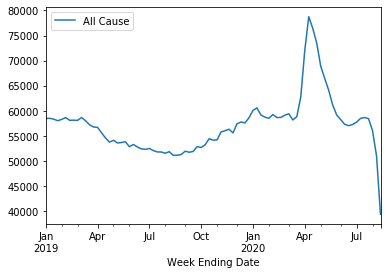

In [92]:
us_only_cdc_df.plot.line(x='Week Ending Date',y='All Cause')

The surge of deaths in March and April 2020 is hard to ignore. The significant decline in August *could* be real effect but it's much more likely to be an artifact of the delay in data reporting as death certificate data takes weeks to make its way into national statistics like these.

But how much of this is due to COVID-19 versus other causes?

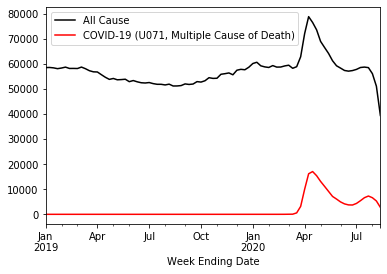

In [93]:
# Make a plot with a black line for deaths from all causes
ax = us_only_cdc_df.plot.line(x='Week Ending Date',y='All Cause',c='k')

# Use the same figure to plot the number of COVID-19 deaths in red
us_only_cdc_df.plot.line(x='Week Ending Date',y='COVID-19 (U071, Multiple Cause of Death)',c='r',ax=ax)

If we plotted the fraction of COVID-19 deaths per "all cause" deaths over time, we see that COVID-19 was responsible for more than 20% of all weekly deaths in the U.S. at its peak in April.

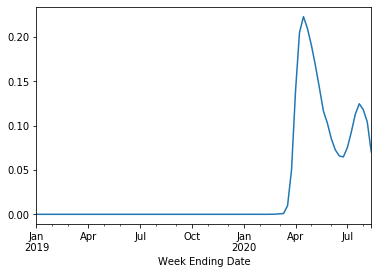

In [94]:
# Divide the COVID deaths by all causes to make a fraction
covid_fraction = us_only_cdc_df['COVID-19 (U071, Multiple Cause of Death)']/us_only_cdc_df['All Cause']

# Use the week ending date as an index
covid_fraction.index = us_only_cdc_df['Week Ending Date']

# Plot
covid_fraction.plot()

If we removed the COVID-19 deaths from the "all cause" deaths, we still see there is a spike in deaths in mid-April. This is what public health officials call "excess deaths", an idea we'll explore together in class.

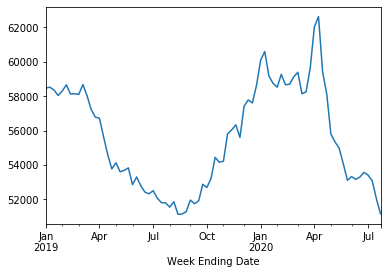

In [95]:
# Subtract COVID-19 deaths from the All Cause deaths
noncovid_all_cause_deaths = us_only_cdc_df['All Cause'] - us_only_cdc_df['COVID-19 (U071, Multiple Cause of Death)']

# Reindex
noncovid_all_cause_deaths.index = us_only_cdc_df['Week Ending Date']

# Plot until the end of July to exclude the anomalous August drop-off
noncovid_all_cause_deaths.loc[:'2020-07-31'].plot()

## In-class exercise

We'll go into our breakout rooms to work on this together. Our goal is to begin to explore the phenomenon of "excess deaths" during the COVID-19 pandemic. See these articles for some background:
* [Excess Deaths Associated with COVID-19](https://www.cdc.gov/nchs/nvss/vsrr/covid19/excess_deaths.htm). CDC.
* [Heart conditions drove spike in deaths beyond those attributed to covid-19, analysis shows](https://www.washingtonpost.com/graphics/2020/investigations/coronavirus-excess-deaths-heart/). *Washington Post*.
* [The True Coronavirus Toll in the U.S. Has Already Surpassed 200,000](https://www.nytimes.com/interactive/2020/08/12/us/covid-deaths-us.html). *The New York Times*.

This is a rise in death rates not directly attributed to COVID-19 but are related to the pandemic because of related causes, misdiagnoses, and delayed/avoided health care. For example, someone with chest pains may avoid seeking medical treatment because they fear going to the ER during a pandemic but they end up dying at home from a heart attack. Because this death could have been prevented with timely medical attention, this is an "excess death" indirectly caused by COVID-19. 

### Step 0: Brainstorm some hypotheses

A frequently-overlooked scientific norm (which we also didn't discuss in Week 01) is writing down your predictions and hypotheses before you see any data. Spend a few minutes to brainstorm about some patterns you might expect to see in this data. 

Knowing what you know now about the history of the COVID-19 pandemic, what kinds of causes of death, what jurisdictions, and what time ranges should we expect to see the biggest disparities between deaths in 2019 and 2020?

### Step 1: Filter out duplicated and aggregated data
First, we want to get rid of the rows of data that could lead to double counts. We do not want to include "New York City" and "United States". We could make a list of the things we do want (the 50 states+DC+PR) **or** we could just list out the things we don't want (US+NYC). The second seems easier. 

Make two Boolean series (`nyc_rows` and `us_rows`) and pass both inside the brackets to `cdc_df`. All you need to do is come up with the comparisons in the first two lines. I've included the operators for negating *and* combining the statements for you in the 6th line.

In [96]:
nyc_rows = cdc_df['Jurisdiction of Occurrence'] == 'New York City'
us_rows = cdc_df['Jurisdiction of Occurrence'] == 'United States'

# Negate each statement, combine them both, Boolean index, and save the result
only_states_cdc_df = cdc_df[~nyc_rows & ~us_rows]
only_states_cdc_df

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
0,Alabama,2019,1,2019-01-05,1077.0,993.0,30.0,198.0,22.0,60.0,21.0,63.0,14.0,21.0,27.0,261.0,53.0,0.0,0.0
1,Alabama,2019,2,2019-01-12,1090.0,994.0,25.0,187.0,24.0,49.0,18.0,85.0,21.0,13.0,11.0,275.0,65.0,0.0,0.0
2,Alabama,2019,3,2019-01-19,1114.0,1042.0,22.0,238.0,18.0,48.0,31.0,80.0,30.0,25.0,15.0,283.0,53.0,0.0,0.0
3,Alabama,2019,4,2019-01-26,1063.0,994.0,21.0,165.0,22.0,50.0,22.0,113.0,14.0,25.0,23.0,279.0,56.0,0.0,0.0
4,Alabama,2019,5,2019-02-02,1095.0,1026.0,18.0,199.0,19.0,52.0,19.0,80.0,20.0,24.0,21.0,290.0,50.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,Wyoming,2020,29,2020-07-18,98.0,86.0,0.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0,NaN,NaN,NaN
4499,Wyoming,2020,30,2020-07-25,93.0,78.0,NaN,15.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,16.0,NaN,NaN,NaN
4500,Wyoming,2020,31,2020-08-01,80.0,68.0,0.0,14.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,16.0,NaN,NaN,0.0
4501,Wyoming,2020,32,2020-08-08,89.0,80.0,0.0,14.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,17.0,NaN,NaN,NaN


### Step 2: Find the week with the maximum COVID-19 deaths

Sort the data and identify the week and jurisdiction that had the most COVID-19 deaths.

In [97]:
only_states_cdc_df['COVID-19 (U071, Multiple cause of death)'].sort_values(ascending=False).head(10)

KeyError: 'COVID-19 (U071, Multiple cause of death)'

### Step 3: Filter the data to find the data for the same week in 2019

Note that the "MMWR Week" column is helpful for making apples-to-apples comparisons about the week of the year across different years.

In [100]:
_c0 = only_states_cdc_df['Jurisdiction of Occurrence'] == "Florida"
_c1 = only_states_cdc_df['MMWR Week'] == 30
only_states_cdc_df[_c0 & _c1]

,Jurisdiction of Occurrence,MMWR Year,MMWR Week,Week Ending Date,All Cause,Natural Cause,Septicemia (A40-A41),Malignant neoplasms (C00-C97),Diabetes mellitus (E10-E14),Alzheimer disease (G30),Influenza and pneumonia (J09-J18),Chronic lower respiratory diseases (J40-J47),"Other diseases of respiratory system (J00-J06,J30-J39,J67,J70-J98)","Nephritis, nephrotic syndrome and nephrosis (N00-N07,N17-N19,N25-N27)","Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified (R00-R99)","Diseases of heart (I00-I09,I11,I13,I20-I51)",Cerebrovascular diseases (I60-I69),"COVID-19 (U071, Multiple Cause of Death)","COVID-19 (U071, Underlying Cause of Death)"
794,Florida,2019,30,2019-07-27,3866.0,3528.0,48.0,859.0,133.0,123.0,44.0,209.0,53.0,66.0,53.0,849.0,252.0,0.0,0.0
846,Florida,2020,30,2020-07-25,5527.0,5242.0,46.0,881.0,161.0,159.0,59.0,214.0,46.0,52.0,311.0,985.0,312.0,1222.0,1105.0


In [102]:
pd.pivot_table(data = cdc_df, index = 'Week', columns = 'State', values = 'All Cause', aggfunc='sum')

KeyError: 'Week'

### Step 4: Compare the non-COVID-19 causes of death in 2020 to 2019

Are the numbers of non-COVID-19 deaths in 2020 higher for the same week of the year than in 2019? Which causes of death have the biggest discrepancies when comparing 2019 and 2020?

### Step 5: Revisit your hypotheses

Were your hypotheses about the kinds of causes, jurisdictions, and time ranges accurate to what the data showed?